<a href="https://colab.research.google.com/github/Madan1512/Niyata_Infotech_Task/blob/main/Task_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
pip install opendatasets

In [2]:
import opendatasets as od
od.download("https://www.kaggle.com/competitions/store-sales-time-series-forecasting/data")



Please provide your Kaggle credentials to download this dataset. Learn more: http://bit.ly/kaggle-creds
Your Kaggle username: madan151203
Your Kaggle Key: ··········


100%|██████████| 21.4M/21.4M [00:00<00:00, 119MB/s] 


Extracting archive ./store-sales-time-series-forecasting/store-sales-time-series-forecasting.zip to ./store-sales-time-series-forecasting


In [3]:
import pandas as pd
import numpy as np

In [4]:
train_df = pd.read_csv("/content/store-sales-time-series-forecasting/train.csv")
test_df = pd.read_csv("/content/store-sales-time-series-forecasting/test.csv")
store_df = pd.read_csv("/content/store-sales-time-series-forecasting/stores.csv")
oil_df = pd.read_csv("/content/store-sales-time-series-forecasting/oil.csv")
holidays_df = pd.read_csv("/content/store-sales-time-series-forecasting/holidays_events.csv")

In [5]:
train_df.head(2)

,id,date,store_nbr,family,sales,onpromotion
0,0,2013-01-01,1,AUTOMOTIVE,0.0,0
1,1,2013-01-01,1,BABY CARE,0.0,0


In [6]:
data = [train_df,test_df,store_df,oil_df,holidays_df]
data_name = ['train_df','test_df','store_df','oil_df','holidays_df']
for j,i in zip(data_name,data):
  print(f'{j}-{i.columns}\n')

train_df-Index(['id', 'date', 'store_nbr', 'family', 'sales', 'onpromotion'], dtype='object')

test_df-Index(['id', 'date', 'store_nbr', 'family', 'onpromotion'], dtype='object')

store_df-Index(['store_nbr', 'city', 'state', 'type', 'cluster'], dtype='object')

oil_df-Index(['date', 'dcoilwtico'], dtype='object')

holidays_df-Index(['date', 'type', 'locale', 'locale_name', 'description', 'transferred'], dtype='object')



In [7]:
train_df = train_df.merge(store_df, on="store_nbr", how="left").merge(oil_df, on="date", how="left").merge(holidays_df, on="date", how="left")
test_df = test_df.merge(store_df, on="store_nbr", how="left").merge(oil_df, on="date", how="left").merge(holidays_df, on="date", how="left")

In [8]:
train_df.columns

Index(['id', 'date', 'store_nbr', 'family', 'sales', 'onpromotion', 'city',
       'state', 'type_x', 'cluster', 'dcoilwtico', 'type_y', 'locale',
       'locale_name', 'description', 'transferred'],
      dtype='object')

In [9]:
test_df.columns

Index(['id', 'date', 'store_nbr', 'family', 'onpromotion', 'city', 'state',
       'type_x', 'cluster', 'dcoilwtico', 'type_y', 'locale', 'locale_name',
       'description', 'transferred'],
      dtype='object')

In [10]:
print(train_df.shape)
print(test_df.shape)

(3054348, 16)
(28512, 15)


In [11]:
tra= train_df.isnull().sum()
tes= test_df.isnull().sum()
print(tra)
print(tes)

id                   0
date                 0
store_nbr            0
family               0
sales                0
onpromotion          0
city                 0
state                0
type_x               0
cluster              0
dcoilwtico      955152
type_y         2551824
locale         2551824
locale_name    2551824
description    2551824
transferred    2551824
dtype: int64
id                 0
date               0
store_nbr          0
family             0
onpromotion        0
city               0
state              0
type_x             0
cluster            0
dcoilwtico      7128
type_y         26730
locale         26730
locale_name    26730
description    26730
transferred    26730
dtype: int64


In [12]:
train_df["dcoilwtico"] = train_df["dcoilwtico"].bfill().ffill()
test_df["dcoilwtico"] = test_df["dcoilwtico"].bfill().ffill()


In [13]:
categorical_col=["type_y","locale","locale_name","description","transferred"]
for col in categorical_col:
  train_df[col] = train_df[col].ffill().bfill()
  test_df[col] = test_df[col].ffill().bfill()

<ipython-input-13-ba5ef8b93d2b>:3: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  train_df[col] = train_df[col].ffill().bfill()
<ipython-input-13-ba5ef8b93d2b>:4: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  test_df[col] = test_df[col].ffill().bfill()


In [14]:
train_df.isnull().sum()

,0
id,0
date,0
store_nbr,0
family,0
sales,0
onpromotion,0
city,0
state,0
type_x,0
cluster,0


In [15]:
test_df.isnull().sum()

,0
id,0
date,0
store_nbr,0
family,0
onpromotion,0
city,0
state,0
type_x,0
cluster,0
dcoilwtico,0


In [16]:
train_df["date"]=pd.to_datetime(train_df["date"])
train_df["day"]=train_df["date"].dt.day
train_df["month"]=train_df["date"].dt.month
train_df["year"]=train_df["date"].dt.year
train_df["day_of_week"]=train_df["date"].dt.dayofweek

In [17]:
test_df["date"]=pd.to_datetime(test_df["date"])
test_df["day"]=test_df["date"].dt.day
test_df["month"]=test_df["date"].dt.month
test_df["day_of_week"]=test_df["date"].dt.dayofweek

In [18]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3054348 entries, 0 to 3054347
Data columns (total 20 columns):
 #   Column       Dtype         
---  ------       -----         
 0   id           int64         
 1   date         datetime64[ns]
 2   store_nbr    int64         
 3   family       object        
 4   sales        float64       
 5   onpromotion  int64         
 6   city         object        
 7   state        object        
 8   type_x       object        
 9   cluster      int64         
 10  dcoilwtico   float64       
 11  type_y       object        
 12  locale       object        
 13  locale_name  object        
 14  description  object        
 15  transferred  bool          
 16  day          int32         
 17  month        int32         
 18  year         int32         
 19  day_of_week  int32         
dtypes: bool(1), datetime64[ns](1), float64(2), int32(4), int64(4), object(8)
memory usage: 399.1+ MB


In [19]:
test_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 28512 entries, 0 to 28511
Data columns (total 18 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   id           28512 non-null  int64         
 1   date         28512 non-null  datetime64[ns]
 2   store_nbr    28512 non-null  int64         
 3   family       28512 non-null  object        
 4   onpromotion  28512 non-null  int64         
 5   city         28512 non-null  object        
 6   state        28512 non-null  object        
 7   type_x       28512 non-null  object        
 8   cluster      28512 non-null  int64         
 9   dcoilwtico   28512 non-null  float64       
 10  type_y       28512 non-null  object        
 11  locale       28512 non-null  object        
 12  locale_name  28512 non-null  object        
 13  description  28512 non-null  object        
 14  transferred  28512 non-null  bool          
 15  day          28512 non-null  int32         
 16  mont

In [20]:
cat_columns=["family","city","state","type_x"]
cols_in_traindf=[col for col in cat_columns if col in train_df.columns]
cols_in_testdf=[col for col in cat_columns if col in test_df.columns]

In [21]:
train_df=pd.get_dummies(train_df,columns=cols_in_traindf,drop_first=True)
test_df=pd.get_dummies(test_df,columns=cols_in_testdf,drop_first=True)

In [22]:
test_df=test_df.reindex(columns=train_df.columns,fill_value=0)

In [23]:
test_df=test_df.drop(columns=["sales"])

In [24]:
train_df.columns

Index(['id', 'date', 'store_nbr', 'sales', 'onpromotion', 'cluster',
       'dcoilwtico', 'type_y', 'locale', 'locale_name', 'description',
       'transferred', 'day', 'month', 'year', 'day_of_week',
       'family_BABY CARE', 'family_BEAUTY', 'family_BEVERAGES', 'family_BOOKS',
       'family_BREAD/BAKERY', 'family_CELEBRATION', 'family_CLEANING',
       'family_DAIRY', 'family_DELI', 'family_EGGS', 'family_FROZEN FOODS',
       'family_GROCERY I', 'family_GROCERY II', 'family_HARDWARE',
       'family_HOME AND KITCHEN I', 'family_HOME AND KITCHEN II',
       'family_HOME APPLIANCES', 'family_HOME CARE', 'family_LADIESWEAR',
       'family_LAWN AND GARDEN', 'family_LINGERIE', 'family_LIQUOR,WINE,BEER',
       'family_MAGAZINES', 'family_MEATS', 'family_PERSONAL CARE',
       'family_PET SUPPLIES', 'family_PLAYERS AND ELECTRONICS',
       'family_POULTRY', 'family_PREPARED FOODS', 'family_PRODUCE',
       'family_SCHOOL AND OFFICE SUPPLIES', 'family_SEAFOOD', 'city_Babahoyo',
       '

In [25]:
test_df.columns

Index(['id', 'date', 'store_nbr', 'onpromotion', 'cluster', 'dcoilwtico',
       'type_y', 'locale', 'locale_name', 'description', 'transferred', 'day',
       'month', 'year', 'day_of_week', 'family_BABY CARE', 'family_BEAUTY',
       'family_BEVERAGES', 'family_BOOKS', 'family_BREAD/BAKERY',
       'family_CELEBRATION', 'family_CLEANING', 'family_DAIRY', 'family_DELI',
       'family_EGGS', 'family_FROZEN FOODS', 'family_GROCERY I',
       'family_GROCERY II', 'family_HARDWARE', 'family_HOME AND KITCHEN I',
       'family_HOME AND KITCHEN II', 'family_HOME APPLIANCES',
       'family_HOME CARE', 'family_LADIESWEAR', 'family_LAWN AND GARDEN',
       'family_LINGERIE', 'family_LIQUOR,WINE,BEER', 'family_MAGAZINES',
       'family_MEATS', 'family_PERSONAL CARE', 'family_PET SUPPLIES',
       'family_PLAYERS AND ELECTRONICS', 'family_POULTRY',
       'family_PREPARED FOODS', 'family_PRODUCE',
       'family_SCHOOL AND OFFICE SUPPLIES', 'family_SEAFOOD', 'city_Babahoyo',
       'city_Caya

In [26]:
from sklearn.preprocessing import LabelEncoder
encoder=LabelEncoder()
for col in cat_columns:
  if col in train_df.columns:
    train_df[col]=encoder.fit_transform(train_df[col].astype(str))
  if col in test_df.columns:
    test_df[col]=encoder.transform(test_df[col].astype(str))

In [27]:
x=train_df.drop(columns=["id","date","sales"])
y=train_df["sales"]


In [28]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42)

In [29]:
x_train.shape

(2443478, 85)

In [30]:
y_train.shape

(2443478,)

In [31]:
x_test.shape

(610870, 85)

In [32]:
categorical_columns=x_train.select_dtypes(include=['object']).columns
print("Categorical_columns: ",categorical_columns)

Categorical_columns:  Index(['type_y', 'locale', 'locale_name', 'description'], dtype='object')


In [33]:
for col in categorical_columns:
  encoder=LabelEncoder()
  x_train[col]=encoder.fit_transform(x_train[col])
  x_test[col]=encoder.transform(x_test[col])

In [34]:
categ=x_train.select_dtypes(include=['object']).columns
print(categ)

Index([], dtype='object')


In [35]:
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor
lr=LinearRegression()
rf=RandomForestRegressor(n_estimators=20,random_state=42)
xgb=XGBRegressor()

In [36]:
lr.fit(x_train,y_train)

LinearRegression()

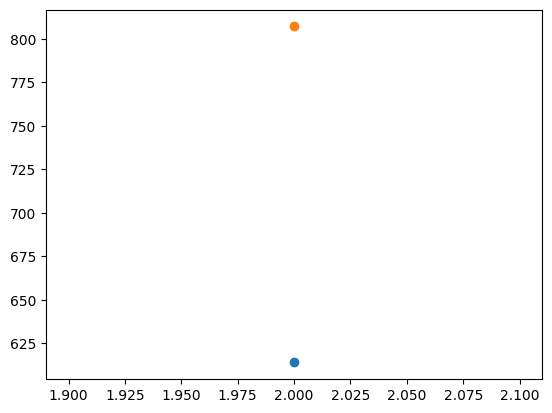

In [59]:
import matplotlib.pyplot as plt
plt.scatter(2,y_train[:1])
plt.scatter(2,xgb.predict(x_train[:1]))
plt.show()

In [37]:
xgb.fit(x_train,y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=None, n_jobs=None,
             num_parallel_tree=None, random_state=None, ...)

In [38]:
rf.fit(x_train,y_train)

RandomForestRegressor(n_estimators=20, random_state=42)

In [46]:
from sklearn.metrics import mean_squared_error,r2_score
import numpy as np


In [49]:
lr_pred=lr.predict(x_test)
lr_rmse=np.sqrt(mean_squared_error(y_test,lr_pred))
lr_rs=r2_score(y_test,lr_pred)
print(lr_rmse)
print(lr_rs)

711.4256208495747
0.5769167342035941


In [50]:
xgb_pred=xgb.predict(x_test)
xgb_rmse=np.sqrt(mean_squared_error(y_test,xgb_pred))
xgb_rs=r2_score(y_test,xgb_pred)
print(xgb_rmse)
print(xgb_rs)

296.1384289418301
0.9266911543391272


In [51]:
rf_pred=rf.predict(x_test)
rf_rmse=np.sqrt(mean_squared_error(y_test,rf_pred))
rf_rs=r2_score(y_test,rf_pred)
print(rf_rmse)
print(rf_rs)

252.47738965171155
0.9467141586076899
